In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
def load_data():
    file_path = "Students _Performance _Prediction.csv"
    df = pd.read_csv(file_path)
    return df

df = load_data()

# Preprocessing
label_encoders = {}
categorical_cols = ["Student_Age", "Sex", "High_School_Type", "Scholarship", "Additional_Work", 
                    "Sports_activity", "Transportation", "Attendance", "Reading", "Notes", 
                    "Listening_in_Class", "Project_work", "Grade"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into train and test
X = df.drop(columns=["Grade", "Student_ID"])
y = df["Grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Streamlit UI
st.title("Student Performance Analysis")

# Display dataset
if st.checkbox("Show Raw Data"):
    st.write(df)

# Visualization: Grade Distribution
st.subheader("Grade Distribution")
grade_counts = df["Grade"].value_counts()
fig, ax = plt.subplots()
ax.bar(grade_counts.index, grade_counts.values, color='skyblue')
ax.set_xlabel("Grade")
ax.set_ylabel("Count")
st.pyplot(fig)

# Weekly Study Hours vs. Grade
st.subheader("Weekly Study Hours vs. Grade")
avg_study_hours = df.groupby("Grade")["Weekly_Study_Hours"].mean()
fig, ax = plt.subplots()
ax.bar(avg_study_hours.index, avg_study_hours.values, color='lightgreen')
ax.set_xlabel("Grade")
ax.set_ylabel("Avg Weekly Study Hours")
st.pyplot(fig)

# Filter by Student Age
target_age = st.selectbox("Select Age Group", df["Student_Age"].unique())
st.write(df[df["Student_Age"] == target_age])

# Model Evaluation
st.subheader("Model Accuracy")
st.write(f"Accuracy: {accuracy:.2f}")
st.text("Classification Report:")
st.text(report)

st.write("Analysis completed.")

: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df=pd.read_csv('Students _Performance _Prediction.csv')
de=pd.DataFrame(df)
print(de)
# Identify categorical columns and apply Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns  # Identify all categorical columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Select features and target variable
X = df[['Student_ID', 'Student_Age', 'Sex', 'High_School_Type',
           'Scholarship', 'Additional_Work', 'Sports_activity',
           'Transportation', 'Weekly_Study_Hours', 
           'Attendance', 'Reading', 
           'Notes', 'Listening_in_Class', 
           'Project_work']]  # Features
y = df['Grade']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.2f}")
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the Decision Tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load and preprocess data
data = pd.read_csv('Students _Performance _Prediction.csv')
df = pd.DataFrame(data)
categorical_columns = data.select_dtypes(include=['object']).columns  
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

X = data[['Student_ID', 'Student_Age', 'Sex', 'High_School_Type',
           'Scholarship', 'Additional_Work', 'Sports_activity',
           'Transportation', 'Weekly_Study_Hours', 
           'Attendance', 'Reading', 
           'Notes', 'Listening_in_Class', 
           'Project_work']]
y = data['Grade']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=34)

regressor = RandomForestRegressor(random_state=34)
regressor.fit(X_train, y_train)

# User Input for Prediction
student_id = input("Enter Student ID (STUDENT1 or STUDENT2 or STUDENT3): ")
student_age = int(input("Enter Student Age (19-22 or 18): "))
sex = input("Enter Sex (Male/Female): ")
high_school_type = input("Enter High School Type (Public/Private): ")
scholarship = int(input("Enter Scholarship (50% or 75% or 100%): "))
additional_work = input("Enter Additional Work (Yes or No): ")
sports_activity = input("Enter Sports Activity (Yes or No): ")
transportation = input("Enter Transportation (Private or Bus): ")
weekly_study_hours = float(input("Enter Weekly Study Hours (0 or 2 or 12): "))
attendance = float(input("Enter Attendance Percentage (1 or 2 or 3): "))
reading = input("Enter Reading Score (Yes or No): ")
notes = float(input("Enter Notes Score (1 or 0): "))
listening_in_class = float(input("Enter Listening in Class Score (1 or 0): "))
project_work = float(input("Enter Project Work Score (1 or 0): "))

input_data = {
    'Student_ID': student_id,
    'Student_Age': student_age,
    'Sex': sex,
    'High_School_Type': high_school_type,
    'Scholarship': scholarship,
    'Additional_Work': additional_work,
    'Sports_activity': sports_activity,
    'Transportation': transportation,
    'Weekly_Study_Hours': weekly_study_hours,
    'Attendance': attendance,
    'Reading': reading,
    'Notes': notes,
    'Listening_in_Class': listening_in_class,
    'Project_work': project_work
}

input_df = pd.DataFrame([input_data])
# Exclude 'Grade' from transformation as it is not part of the input data
for col in categorical_columns:
    if col != 'Grade' and col in label_encoders:
        try:
            input_df[col] = label_encoders[col].transform(input_df[col])
        except ValueError:
            # Handle unseen labels by assigning a default value (e.g., the most frequent label or -1)
            input_df[col] = input_df[col].apply(lambda x: label_encoders[col].classes_[0] if x in label_encoders[col].classes_ else -1)
predicted_grade= regressor.predict(input_df)
print(f"The predicted Grade is: {predicted_grade[0]:.2f}")

In [ ]:
# Student Grade Prediction (Jupyter Notebook Compatible)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 🎯 Grade Mapping Functions
# ----------------------------
def map_grade_letter_to_numeric(letter):
    mapping = {
        "F": 0.0, "D": 1.0, "C-": 1.75, "C": 2.0, "C+": 2.5,
        "B-": 2.75, "B": 3.0, "B+": 3.5, "A-": 3.75, "A": 4.0, "A+": 4.1, "AA": 4.0
    }
    return mapping.get(str(letter).upper(), 0.0)

def convert_numeric_to_letter(grade):
    if grade < 1.0:
        return "F"
    elif grade < 1.75:
        return "D"
    elif grade < 2.0:
        return "C-"
    elif grade < 2.5:
        return "C"
    elif grade < 2.75:
        return "C+"
    elif grade < 3.0:
        return "B-"
    elif grade < 3.5:
        return "B"
    elif grade < 3.75:
        return "B+"
    elif grade < 4.0:
        return "A-"
    elif grade <= 4.0:
        return "A"
    else:
        return "A+"

# ----------------------------
# 🔁 Age Conversion Helper
# ----------------------------
def convert_age(age_value):
    if '-' in str(age_value):
        parts = age_value.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(age_value)
    except:
        return None

# ----------------------------
# 📥 Load and Preprocess Data
# ----------------------------
data = pd.read_csv("Students _Performance _Prediction.csv")

data['Scholarship'] = data['Scholarship'].str.replace('%', '', regex=False).astype(float)
data['Student_Age'] = data['Student_Age'].apply(convert_age)
data['Grade'] = data['Grade'].apply(map_grade_letter_to_numeric)

# Encode categoricals
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Features & Target
features = ['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
            'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
            'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
X = data[features]
y = data['Grade']

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ----------------------------
# 🧪 Predict on Test Set
# ----------------------------
y_pred = model.predict(X_test)
results = pd.DataFrame({
    'Actual (Numeric)': y_test,
    'Predicted (Numeric)': y_pred,
    'Predicted (Letter)': [convert_numeric_to_letter(p) for p in y_pred]
})

# Display prediction results
print(results.head())

# Optional: Plotting
plt.figure(figsize=(10,6))
plt.plot(results['Actual (Numeric)'].values, label='Actual', marker='o')
plt.plot(results['Predicted (Numeric)'].values, label='Predicted', marker='x')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Sample Index')
plt.ylabel('Grade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# model.ipynb

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Grade mapping functions
def convert_numeric_to_letter(score):
    # Grade scale based on the score
    if score < 40:
        return "F"
    elif 40 <= score < 45:
        return "D"
    elif 45 <= score < 50:
        return "C-"
    elif 50 <= score < 60:
        return "C"
    elif 60 <= score < 65:
        return "C+"
    elif 65 <= score < 70:
        return "B-"
    elif 70 <= score < 75:
        return "B"
    elif 75 <= score < 80:
        return "B+"
    elif 80 <= score < 85:
        return "A-"
    elif 85 <= score < 90:
        return "A"
    elif 90 <= score <= 100:
        return "A+"
    else:
        return "Invalid"  # In case score is outside 0-100

# Safe encoding function
def safe_transform(label, encoder):
    if label in encoder.classes_:
        return encoder.transform([label])[0]
    else:
        encoder.classes_ = np.append(encoder.classes_, label)
        return encoder.transform([label])[0]

# Age conversion helper
def convert_age(age_value):
    if '-' in str(age_value):
        parts = age_value.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(age_value)
    except:
        return None

# Load and preprocess data
data = pd.read_csv("Students _Performance _Prediction.csv")
data['Scholarship'] = data['Scholarship'].str.replace('%', '', regex=False).astype(float)
data['Student_Age'] = data['Student_Age'].apply(convert_age)

# Encode categorical columns
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = ['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
            'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
            'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
X = data[features]
y = data['Grade']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)

# Calculate the accuracy or any other evaluation metrics you prefer
# For simplicity, let's print the first few predictions along with actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

# You can also calculate the performance metrics such as Mean Squared Error, R^2 etc.
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

In [ ]:
# model.ipynb

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Grade mapping functions
def convert_numeric_to_letter(score):
    # Grade scale based on the score
    if score < 40:
        return "F"
    elif 40 <= score < 45:
        return "D"
    elif 45 <= score < 50:
        return "C-"
    elif 50 <= score < 60:
        return "C"
    elif 60 <= score < 65:
        return "C+"
    elif 65 <= score < 70:
        return "B-"
    elif 70 <= score < 75:
        return "B"
    elif 75 <= score < 80:
        return "B+"
    elif 80 <= score < 85:
        return "A-"
    elif 85 <= score < 90:
        return "A"
    elif 90 <= score <= 100:
        return "A+"
    else:
        return "Invalid"  # In case score is outside 0-100

# Safe encoding function
def safe_transform(label, encoder):
    if label in encoder.classes_:
        return encoder.transform([label])[0]
    else:
        encoder.classes_ = np.append(encoder.classes_, label)
        return encoder.transform([label])[0]

# Age conversion helper
def convert_age(age_value):
    if '-' in str(age_value):
        parts = age_value.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(age_value)
    except:
        return None

# Load and preprocess data
data = pd.read_csv("Students _Performance _Prediction.csv")
data['Scholarship'] = data['Scholarship'].str.replace('%', '', regex=False).astype(float)
data['Student_Age'] = data['Student_Age'].apply(convert_age)

# Encode categorical columns
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = ['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
            'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
            'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
X = data[features]
y = data['Grade']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Function for prediction based on user input
def predict_grade(user_input):
    input_dict = {
        'Student_Age': convert_age(user_input['Student_Age']),
        'Sex': safe_transform(user_input['Sex'], label_encoders['Sex']),
        'High_School_Type': safe_transform(user_input['High_School_Type'], label_encoders['High_School_Type']),
        'Scholarship': float(user_input['Scholarship']),
        'Additional_Work': safe_transform(user_input['Additional_Work'], label_encoders['Additional_Work']),
        'Sports_activity': safe_transform(user_input['Sports_activity'], label_encoders['Sports_activity']),
        'Transportation': safe_transform(user_input['Transportation'], label_encoders['Transportation']),
        'Weekly_Study_Hours': float(user_input['Weekly_Study_Hours']),
        'Attendance': safe_transform(user_input['Attendance'], label_encoders['Attendance']),
        'Reading': safe_transform(user_input['Reading'], label_encoders['Reading']),
        'Notes': safe_transform(user_input['Notes'], label_encoders['Notes']),
        'Listening_in_Class': safe_transform(user_input['Listening_in_Class'], label_encoders['Listening_in_Class']),
        'Project_work': safe_transform(user_input['Project_work'], label_encoders['Project_work'])
    }
    
    input_df = pd.DataFrame([input_dict])
    prediction = model.predict(input_df)[0]
    letter_grade = convert_numeric_to_letter(prediction)
    return prediction, letter_grade

# Example of how you can provide user input and get predictions:
user_input = {
    'Student_Age': '20',
    'Sex': 'Male',
    'High_School_Type': 'Private',
    'Scholarship': '75',
    'Additional_Work': 'No',
    'Sports_activity': 'Yes',
    'Transportation': 'Bus',
    'Weekly_Study_Hours': '10',
    'Attendance': 'Always',
    'Reading': 'Yes',
    'Notes': 'Yes',
    'Listening_in_Class': 'Yes',
    'Project_work': 'Yes'
}

# Call the prediction function with user input
predicted_score, predicted_grade = predict_grade(user_input)
print(f"Predicted Score: {predicted_score:.2f}, Predicted Grade: {predicted_grade}")

In [ ]:
# model.ipynb

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Grade mapping functions
def convert_numeric_to_letter(score):
    # Grade scale based on the score
    if score < 40:
        return "F"
    elif 40 <= score < 45:
        return "D"
    elif 45 <= score < 50:
        return "C-"
    elif 50 <= score < 60:
        return "C"
    elif 60 <= score < 65:
        return "C+"
    elif 65 <= score < 70:
        return "B-"
    elif 70 <= score < 75:
        return "B"
    elif 75 <= score < 80:
        return "B+"
    elif 80 <= score < 85:
        return "A-"
    elif 85 <= score < 90:
        return "A"
    elif 90 <= score <= 100:
        return "A+"
    else:
        return "Invalid"  # In case score is outside 0-100

# Safe encoding function
def safe_transform(label, encoder):
    if label in encoder.classes_:
        return encoder.transform([label])[0]
    else:
        encoder.classes_ = np.append(encoder.classes_, label)
        return encoder.transform([label])[0]

# Age conversion helper
def convert_age(age_value):
    if '-' in str(age_value):
        parts = age_value.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(age_value)
    except:
        return None

# Load and preprocess data
data = pd.read_csv("Students _Performance _Prediction.csv")
data['Scholarship'] = data['Scholarship'].str.replace('%', '', regex=False).astype(float)
data['Student_Age'] = data['Student_Age'].apply(convert_age)

# Encode categorical columns
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = ['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
            'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
            'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
X = data[features]
y = data['Grade']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Function for prediction based on user input
def predict_grade(user_input):
    input_dict = {
        'Student_Age': convert_age(user_input['Student_Age']),
        'Sex': safe_transform(user_input['Sex'], label_encoders['Sex']),
        'High_School_Type': safe_transform(user_input['High_School_Type'], label_encoders['High_School_Type']),
        'Scholarship': float(user_input['Scholarship']),
        'Additional_Work': safe_transform(user_input['Additional_Work'], label_encoders['Additional_Work']),
        'Sports_activity': safe_transform(user_input['Sports_activity'], label_encoders['Sports_activity']),
        'Transportation': safe_transform(user_input['Transportation'], label_encoders['Transportation']),
        'Weekly_Study_Hours': float(user_input['Weekly_Study_Hours']),
        'Attendance': safe_transform(user_input['Attendance'], label_encoders['Attendance']),
        'Reading': safe_transform(user_input['Reading'], label_encoders['Reading']),
        'Notes': safe_transform(user_input['Notes'], label_encoders['Notes']),
        'Listening_in_Class': safe_transform(user_input['Listening_in_Class'], label_encoders['Listening_in_Class']),
        'Project_work': safe_transform(user_input['Project_work'], label_encoders['Project_work'])
    }
    
    input_df = pd.DataFrame([input_dict])
    prediction = model.predict(input_df)[0]
    letter_grade = convert_numeric_to_letter(prediction)
    return prediction, letter_grade

# Provide your own input values manually
user_input = {
    'Student_Age': '20',  # Age
    'Sex': 'Male',  # Sex
    'High_School_Type': 'Private',  # High School Type
    'Scholarship': '75',  # Scholarship percentage
    'Additional_Work': 'No',  # Additional Work (Yes/No)
    'Sports_activity': 'Yes',  # Sports Activity (Yes/No)
    'Transportation': 'Bus',  # Transportation (Bus/Private)
    'Weekly_Study_Hours': '10',  # Weekly Study Hours
    'Attendance': 'Always',  # Attendance (Always/Never/Sometimes)
    'Reading': 'Yes',  # Reading (Yes/No)
    'Notes': 'Yes',  # Takes Notes (Yes/No)
    'Listening_in_Class': 'Yes',  # Listening in Class (Yes/No)
    'Project_work': 'Yes'  # Project Work (Yes/No)
}

# Call the prediction function with your input
predicted_score, predicted_grade = predict_grade(user_input)
print(f"Predicted Score: {predicted_score:.2f}, Predicted Grade: {predicted_grade}")

In [ ]:
# model.ipynb

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Grade mapping functions
def convert_numeric_to_letter(score):
    # Grade scale based on the score
    if score < 1:
        return "F"
    elif 1 <= score < 1.75:
        return "D"
    elif 1.75 <= score < 2:
        return "C-"
    elif 2 <= score < 2.5:
        return "C"
    elif 2.5 <= score < 2.75:
        return "C+"
    elif 2.75 <= score < 3:
        return "B-"
    elif 3 <= score < 3.5:
        return "B"
    elif 3.5 <= score < 3.75:
        return "B+"
    elif 3.75 <= score < 4:
        return "A-"
    elif 4 <= score < 4.25:
        return "A"
    else:
        return "A+"  # For any score greater than or equal to 4

# Safe encoding function
def safe_transform(label, encoder):
    if label in encoder.classes_:
        return encoder.transform([label])[0]
    else:
        encoder.classes_ = np.append(encoder.classes_, label)
        return encoder.transform([label])[0]

# Age conversion helper
def convert_age(age_value):
    if '-' in str(age_value):
        parts = age_value.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(age_value)
    except:
        return None

# Load and preprocess data
data = pd.read_csv("Students _Performance _Prediction.csv")
data['Scholarship'] = data['Scholarship'].str.replace('%', '', regex=False).astype(float)
data['Student_Age'] = data['Student_Age'].apply(convert_age)

# Encode categorical columns
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = ['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
            'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
            'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
X = data[features]
y = data['Grade']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Function for prediction based on user input
def predict_grade(user_input):
    input_dict = {
        'Student_Age': convert_age(user_input['Student_Age']),
        'Sex': safe_transform(user_input['Sex'], label_encoders['Sex']),
        'High_School_Type': safe_transform(user_input['High_School_Type'], label_encoders['High_School_Type']),
        'Scholarship': float(user_input['Scholarship']),
        'Additional_Work': safe_transform(user_input['Additional_Work'], label_encoders['Additional_Work']),
        'Sports_activity': safe_transform(user_input['Sports_activity'], label_encoders['Sports_activity']),
        'Transportation': safe_transform(user_input['Transportation'], label_encoders['Transportation']),
        'Weekly_Study_Hours': float(user_input['Weekly_Study_Hours']),
        'Attendance': safe_transform(user_input['Attendance'], label_encoders['Attendance']),
        'Reading': safe_transform(user_input['Reading'], label_encoders['Reading']),
        'Notes': safe_transform(user_input['Notes'], label_encoders['Notes']),
        'Listening_in_Class': safe_transform(user_input['Listening_in_Class'], label_encoders['Listening_in_Class']),
        'Project_work': safe_transform(user_input['Project_work'], label_encoders['Project_work'])
    }
    
    input_df = pd.DataFrame([input_dict])
    prediction = model.predict(input_df)[0]
    letter_grade = convert_numeric_to_letter(prediction)
    return prediction, letter_grade

# Provide your own input values manually
user_input = {
    'Student_Age': '19-22',  # Age (range)
    'Sex': 'Male',  # Sex
    'High_School_Type': 'Other',  # High School Type
    'Scholarship': '50%',  # Scholarship percentage
    'Additional_Work': 'Yes',  # Additional Work (Yes/No)
    'Sports_activity': 'No',  # Sports Activity (Yes/No)
    'Transportation': 'Private',  # Transportation (Private/Bus)
    'Weekly_Study_Hours': '0',  # Weekly Study Hours
    'Attendance': 'Always',  # Attendance (Always/Never/Sometimes)
    'Reading': 'Yes',  # Reading (Yes/No)
    'Notes': 'Yes',  # Takes Notes (Yes/No)
    'Listening_in_Class': 'No',  # Listening in Class (Yes/No)
    'Project_work': 'No'  # Project Work (Yes/No)
}

# Call the prediction function with your input
predicted_score, predicted_grade = predict_grade(user_input)
print(f"Predicted Score: {predicted_score:.2f}, Predicted Grade: {predicted_grade}")

In [ ]:
# model.ipynb

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Grade mapping functions
def convert_numeric_to_letter(score):
    # Grade scale based on the score
    if score < 1:
        return "F"
    elif 1 <= score < 1.75:
        return "D"
    elif 1.75 <= score < 2:
        return "C-"
    elif 2 <= score < 2.5:
        return "C"
    elif 2.5 <= score < 2.75:
        return "C+"
    elif 2.75 <= score < 3:
        return "B-"
    elif 3 <= score < 3.5:
        return "B"
    elif 3.5 <= score < 3.75:
        return "B+"
    elif 3.75 <= score < 4:
        return "A-"
    elif 4 <= score < 4.25:
        return "A"
    else:
        return "A+"  # For any score greater than or equal to 4

# Safe encoding function
def safe_transform(label, encoder):
    if label in encoder.classes_:
        return encoder.transform([label])[0]
    else:
        encoder.classes_ = np.append(encoder.classes_, label)
        return encoder.transform([label])[0]

# Age conversion helper
def convert_age(age_value):
    if '-' in str(age_value):
        parts = age_value.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(age_value)
    except:
        return None

# Scholarship conversion function
def convert_scholarship(scholarship_value):
    return float(scholarship_value.replace('%', '').strip()) / 100

# Load and preprocess data
data = pd.read_csv("Students _Performance _Prediction.csv")
data['Scholarship'] = data['Scholarship'].apply(convert_scholarship)
data['Student_Age'] = data['Student_Age'].apply(convert_age)

# Encode categorical columns
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = ['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
            'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
            'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
X = data[features]
y = data['Grade']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Function for prediction based on user input
def predict_grade(user_input):
    input_dict = {
        'Student_Age': convert_age(user_input['Student_Age']),
        'Sex': safe_transform(user_input['Sex'], label_encoders['Sex']),
        'High_School_Type': safe_transform(user_input['High_School_Type'], label_encoders['High_School_Type']),
        'Scholarship': convert_scholarship(user_input['Scholarship']),
        'Additional_Work': safe_transform(user_input['Additional_Work'], label_encoders['Additional_Work']),
        'Sports_activity': safe_transform(user_input['Sports_activity'], label_encoders['Sports_activity']),
        'Transportation': safe_transform(user_input['Transportation'], label_encoders['Transportation']),
        'Weekly_Study_Hours': float(user_input['Weekly_Study_Hours']),
        'Attendance': safe_transform(user_input['Attendance'], label_encoders['Attendance']),
        'Reading': safe_transform(user_input['Reading'], label_encoders['Reading']),
        'Notes': safe_transform(user_input['Notes'], label_encoders['Notes']),
        'Listening_in_Class': safe_transform(user_input['Listening_in_Class'], label_encoders['Listening_in_Class']),
        'Project_work': safe_transform(user_input['Project_work'], label_encoders['Project_work'])
    }
    
    input_df = pd.DataFrame([input_dict])
    prediction = model.predict(input_df)[0]
    letter_grade = convert_numeric_to_letter(prediction)
    return prediction, letter_grade

# Provide your own input values manually
user_input = {
    'Student_Age': '19-22',  # Age (range)
    'Sex': 'Male',  # Sex
    'High_School_Type': 'Other',  # High School Type
    'Scholarship': '50%',  # Scholarship percentage
    'Additional_Work': 'Yes',  # Additional Work (Yes/No)
    'Sports_activity': 'No',  # Sports Activity (Yes/No)
    'Transportation': 'Private',  # Transportation (Private/Bus)
    'Weekly_Study_Hours': '0',  # Weekly Study Hours
    'Attendance': 'Always',  # Attendance (Always/Never/Sometimes)
    'Reading': 'Yes',  # Reading (Yes/No)
    'Notes': 'Yes',  # Takes Notes (Yes/No)
    'Listening_in_Class': 'No',  # Listening in Class (Yes/No)
    'Project_work': 'No'  # Project Work (Yes/No)
}

# Call the prediction function with your input
predicted_score, predicted_grade = predict_grade(user_input)
print(f"Predicted Score: {predicted_score:.2f}, Predicted Grade: {predicted_grade}")

In [ ]:
# model.ipynb

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Grade mapping functions
def convert_numeric_to_letter(score):
    # Grade scale based on the score
    if score < 1:
        return "F"
    elif 1 <= score < 1.75:
        return "D"
    elif 1.75 <= score < 2:
        return "C-"
    elif 2 <= score < 2.5:
        return "C"
    elif 2.5 <= score < 2.75:
        return "C+"
    elif 2.75 <= score < 3:
        return "B-"
    elif 3 <= score < 3.5:
        return "B"
    elif 3.5 <= score < 3.75:
        return "B+"
    elif 3.75 <= score < 4:
        return "A-"
    elif 4 <= score < 4.25:
        return "A"
    else:
        return "A+"  # For any score greater than or equal to 4

# Safe encoding function
def safe_transform(label, encoder):
    if label in encoder.classes_:
        return encoder.transform([label])[0]
    else:
        encoder.classes_ = np.append(encoder.classes_, label)
        return encoder.transform([label])[0]

# Age conversion helper
def convert_age(age_value):
    if '-' in str(age_value):
        parts = age_value.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(age_value)
    except:
        return None

# Scholarship conversion function (fixed)
def convert_scholarship(scholarship_value):
    # Check if the value is a string with a '%' symbol
    if isinstance(scholarship_value, str):
        return float(scholarship_value.replace('%', '').strip()) / 100
    # If it's already a float, just return it as is
    return float(scholarship_value) / 100

# Load and preprocess data
data = pd.read_csv("Students _Performance _Prediction.csv")
data['Scholarship'] = data['Scholarship'].apply(convert_scholarship)
data['Student_Age'] = data['Student_Age'].apply(convert_age)

# Encode categorical columns
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = ['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
            'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
            'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
X = data[features]
y = data['Grade']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Function for prediction based on user input
def predict_grade(user_input):
    input_dict = {
        'Student_Age': convert_age(user_input['Student_Age']),
        'Sex': safe_transform(user_input['Sex'], label_encoders['Sex']),
        'High_School_Type': safe_transform(user_input['High_School_Type'], label_encoders['High_School_Type']),
        'Scholarship': convert_scholarship(user_input['Scholarship']),
        'Additional_Work': safe_transform(user_input['Additional_Work'], label_encoders['Additional_Work']),
        'Sports_activity': safe_transform(user_input['Sports_activity'], label_encoders['Sports_activity']),
        'Transportation': safe_transform(user_input['Transportation'], label_encoders['Transportation']),
        'Weekly_Study_Hours': float(user_input['Weekly_Study_Hours']),
        'Attendance': safe_transform(user_input['Attendance'], label_encoders['Attendance']),
        'Reading': safe_transform(user_input['Reading'], label_encoders['Reading']),
        'Notes': safe_transform(user_input['Notes'], label_encoders['Notes']),
        'Listening_in_Class': safe_transform(user_input['Listening_in_Class'], label_encoders['Listening_in_Class']),
        'Project_work': safe_transform(user_input['Project_work'], label_encoders['Project_work'])
    }
    
    input_df = pd.DataFrame([input_dict])
    prediction = model.predict(input_df)[0]
    letter_grade = convert_numeric_to_letter(prediction)
    return prediction, letter_grade

# Provide your own input values manually
user_input = {
    'Student_Age': '19-22',  # Age (range)
    'Sex': 'Male',  # Sex
    'High_School_Type': 'Other',  # High School Type
    'Scholarship': '50%',  # Scholarship percentage
    'Additional_Work': 'Yes',  # Additional Work (Yes/No)
    'Sports_activity': 'No',  # Sports Activity (Yes/No)
    'Transportation': 'Private',  # Transportation (Private/Bus)
    'Weekly_Study_Hours': '0',  # Weekly Study Hours
    'Attendance': 'Always',  # Attendance (Always/Never/Sometimes)
    'Reading': 'Yes',  # Reading (Yes/No)
    'Notes': 'Yes',  # Takes Notes (Yes/No)
    'Listening_in_Class': 'No',  # Listening in Class (Yes/No)
    'Project_work': 'No'  # Project Work (Yes/No)
}

# Call the prediction function with your input
predicted_score, predicted_grade = predict_grade(user_input)
print(f"Predicted Score: {predicted_score:.2f}, Predicted Grade: {predicted_grade}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Grade mapping function based on your criteria
def convert_numeric_to_letter(score):
    if score < 40:
        return "F"
    elif 40 <= score < 45:
        return "D"
    elif 45 <= score < 50:
        return "C-"
    elif 50 <= score < 60:
        return "C"
    elif 60 <= score < 65:
        return "C+"
    elif 65 <= score < 70:
        return "B-"
    elif 70 <= score < 75:
        return "B"
    elif 75 <= score < 80:
        return "B+"
    elif 80 <= score < 85:
        return "A-"
    elif 85 <= score < 90:
        return "A"
    elif 90 <= score <= 100:
        return "A+"
    else:
        return "Invalid"  # In case score is outside 0-100

# Safe encoding function for categorical data
def safe_transform(label, encoder):
    if label in encoder.classes_:
        return encoder.transform([label])[0]
    else:
        encoder.classes_ = np.append(encoder.classes_, label)
        return encoder.transform([label])[0]

# Age conversion helper function
def convert_age(age_value):
    if '-' in str(age_value):
        parts = age_value.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(age_value)
    except:
        return None

# Scholarship conversion function
def convert_scholarship(scholarship_value):
    # Assuming the format is in percentage, e.g., '50%'
    return float(scholarship_value.replace('%', '').strip()) / 100

# Load and preprocess data
data = pd.read_csv("Students _Performance _Prediction.csv")

# Convert columns
data['Scholarship'] = data['Scholarship'].apply(convert_scholarship)
data['Student_Age'] = data['Student_Age'].apply(convert_age)

# Encode categorical columns
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target variable
features = ['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
            'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
            'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
X = data[features]
y = data['Grade']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict Grade Function
def predict_grade(user_input):
    input_dict = {
        'Student_Age': convert_age(user_input['Student_Age']),
        'Sex': safe_transform(user_input['Sex'], label_encoders['Sex']),
        'High_School_Type': safe_transform(user_input['High_School_Type'], label_encoders['High_School_Type']),
        'Scholarship': convert_scholarship(user_input['Scholarship']),
        'Additional_Work': safe_transform(user_input['Additional_Work'], label_encoders['Additional_Work']),
        'Sports_activity': safe_transform(user_input['Sports_activity'], label_encoders['Sports_activity']),
        'Transportation': safe_transform(user_input['Transportation'], label_encoders['Transportation']),
        'Weekly_Study_Hours': float(user_input['Weekly_Study_Hours']),
        'Attendance': safe_transform(user_input['Attendance'], label_encoders['Attendance']),
        'Reading': safe_transform(user_input['Reading'], label_encoders['Reading']),
        'Notes': safe_transform(user_input['Notes'], label_encoders['Notes']),
        'Listening_in_Class': safe_transform(user_input['Listening_in_Class'], label_encoders['Listening_in_Class']),
        'Project_work': safe_transform(user_input['Project_work'], label_encoders['Project_work'])
    }
    
    # Convert input to DataFrame and make prediction
    input_df = pd.DataFrame([input_dict])
    prediction = model.predict(input_df)[0]
    
    # Convert the numeric score to letter grade
    letter_grade = convert_numeric_to_letter(prediction)
    
    return prediction, letter_grade

# Example user input for testing
user_input = {
    'Student_Age': '19-22',  # Age range
    'Sex': 'Male',  # Gender
    'High_School_Type': 'Other',  # Type of High School
    'Scholarship': '50%',  # Scholarship in percentage
    'Additional_Work': 'Yes',  # Additional work involvement
    'Sports_activity': 'No',  # Sports activity involvement
    'Transportation': 'Private',  # Transportation mode
    'Weekly_Study_Hours': '0',  # Weekly study hours
    'Attendance': 'Always',  # Attendance level
    'Reading': 'Yes',  # Reading habit
    'Notes': 'Yes',  # Note-taking habit
    'Listening_in_Class': 'No',  # Listening during class
    'Project_work': 'No'  # Project work involvement
}

# Get the prediction
predicted_score, predicted_grade = predict_grade(user_input)
print(f"Predicted Score: {predicted_score:.2f}, Predicted Grade: {predicted_grade}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Grade mapping function based on your criteria
def convert_numeric_to_letter(score):
    if score < 40:
        return "F"
    elif 40 <= score < 45:
        return "D"
    elif 45 <= score < 50:
        return "C-"
    elif 50 <= score < 60:
        return "C"
    elif 60 <= score < 65:
        return "C+"
    elif 65 <= score < 70:
        return "B-"
    elif 70 <= score < 75:
        return "B"
    elif 75 <= score < 80:
        return "B+"
    elif 80 <= score < 85:
        return "A-"
    elif 85 <= score < 90:
        return "A"
    elif 90 <= score <= 100:
        return "A+"
    else:
        return "Invalid"  # In case score is outside 0-100

# Safe encoding function for categorical data
def safe_transform(label, encoder):
    if label in encoder.classes_:
        return encoder.transform([label])[0]
    else:
        encoder.classes_ = np.append(encoder.classes_, label)
        return encoder.transform([label])[0]

# Age conversion helper function
def convert_age(age_value):
    if '-' in str(age_value):
        parts = age_value.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(age_value)
    except:
        return None

# Scholarship conversion function to handle both strings and numbers
def convert_scholarship(scholarship_value):
    if isinstance(scholarship_value, str):  # Check if the value is a string
        return float(scholarship_value.replace('%', '').strip()) / 100
    else:
        return float(scholarship_value)  # If it's already a float, return it as is

# Load and preprocess data
data = pd.read_csv("Students _Performance _Prediction.csv")

# Convert columns
data['Scholarship'] = data['Scholarship'].apply(convert_scholarship)
data['Student_Age'] = data['Student_Age'].apply(convert_age)

# Encode categorical columns
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target variable
features = ['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
            'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance',
            'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
X = data[features]
y = data['Grade']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict Grade Function
def predict_grade(user_input):
    input_dict = {
        'Student_Age': convert_age(user_input['Student_Age']),
        'Sex': safe_transform(user_input['Sex'], label_encoders['Sex']),
        'High_School_Type': safe_transform(user_input['High_School_Type'], label_encoders['High_School_Type']),
        'Scholarship': convert_scholarship(user_input['Scholarship']),
        'Additional_Work': safe_transform(user_input['Additional_Work'], label_encoders['Additional_Work']),
        'Sports_activity': safe_transform(user_input['Sports_activity'], label_encoders['Sports_activity']),
        'Transportation': safe_transform(user_input['Transportation'], label_encoders['Transportation']),
        'Weekly_Study_Hours': float(user_input['Weekly_Study_Hours']),
        'Attendance': safe_transform(user_input['Attendance'], label_encoders['Attendance']),
        'Reading': safe_transform(user_input['Reading'], label_encoders['Reading']),
        'Notes': safe_transform(user_input['Notes'], label_encoders['Notes']),
        'Listening_in_Class': safe_transform(user_input['Listening_in_Class'], label_encoders['Listening_in_Class']),
        'Project_work': safe_transform(user_input['Project_work'], label_encoders['Project_work'])
    }
    
    # Convert input to DataFrame and make prediction
    input_df = pd.DataFrame([input_dict])
    prediction = model.predict(input_df)[0]
    
    # Convert the numeric score to letter grade
    letter_grade = convert_numeric_to_letter(prediction)
    
    return prediction, letter_grade

# Example user input for testing
user_input = {
    'Student_Age': '19-22',  # Age range
    'Sex': 'Male',  # Gender
    'High_School_Type': 'Other',  # Type of High School
    'Scholarship': '50%',  # Scholarship in percentage
    'Additional_Work': 'Yes',  # Additional work involvement
    'Sports_activity': 'No',  # Sports activity involvement
    'Transportation': 'Private',  # Transportation mode
    'Weekly_Study_Hours': '0',  # Weekly study hours
    'Attendance': 'Always',  # Attendance level
    'Reading': 'Yes',  # Reading habit
    'Notes': 'Yes',  # Note-taking habit
    'Listening_in_Class': 'No',  # Listening during class
    'Project_work': 'No'  # Project work involvement
}

# Get the prediction
predicted_score, predicted_grade = predict_grade(user_input)
print(f"Predicted Score: {predicted_score:.2f}, Predicted Grade: {predicted_grade}")


In [ ]:
# Import required libraries

import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split  # To split dataset
from sklearn.pipeline import Pipeline  # For building ML workflow
from sklearn.compose import ColumnTransformer  # To apply preprocessing to columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling & encoding
from sklearn.ensemble import RandomForestClassifier  # Chosen ML model
from sklearn.impute import SimpleImputer  # To handle missing data
import joblib  # To save the trained model

In [ ]:
# 1. Load dataset

df = pd.read_csv('Students _Performance _Prediction.csv')  # Load data from CSV
print(df)

     Student_ID Student_Age     Sex High_School_Type Scholarship  \
0      STUDENT1       19-22    Male            Other         50%   
1      STUDENT2       19-22    Male            Other         50%   
2      STUDENT3       19-22    Male            State         50%   
3      STUDENT4          18  Female          Private         50%   
4      STUDENT5       19-22    Male          Private         50%   
..          ...         ...     ...              ...         ...   
140  STUDENT141       19-22  Female            State         50%   
141  STUDENT142          18  Female            State         75%   
142  STUDENT143          18  Female          Private         75%   
143  STUDENT144       19-22  Female            State         75%   
144  STUDENT145          18  Female          Private        100%   

    Additional_Work Sports_activity Transportation  Weekly_Study_Hours  \
0               Yes              No        Private                   0   
1               Yes              No

In [ ]:
# Data cleaning and preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

AttributeError: Can only use .str accessor with string values!

In [ ]:
# 6. Define final machine learning pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # ML model
])

In [ ]:
# 7. Train the model

model.fit(X_train, y_train)  # Fit model on training data

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Scholarship',
                                                   'Weekly_Study_Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Student_Age', 'Sex',
                                                   'High_School_Type',
                                                   'Additional_Work',
                                                   'Sports_activity',
                                                   'Transportation',
                                                   'Attendance', 'Reading',
                                                   'Notes',
                                                   'Listening_in_Class',
                                                   'Project_work'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# 8. Save trained model for future use

joblib.dump(model, 'student_grade_predictor.pkl')  # Save model to file

print("✅ Model saved as student_grade_predictor.pkl")

✅ Model saved as student_grade_predictor.pkl


In [ ]:
# Train the model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Function to get user input and make prediction
def predict_grade():
    print("Please enter the following student details:")
    
    features = {
        'Student_Age': input("Age group (18/19-22/23-27): "),
        'Sex': input("Gender (Male/Female): "),
        'High_School_Type': input("High School Type (State/Private/Other): "),
        'Scholarship': float(input("Scholarship percentage (0-100, without %): ")) / 100,
        'Additional_Work': input("Additional Work (Yes/No): "),
        'Sports_activity': input("Sports Activity (Yes/No): "),
        'Transportation': input("Transportation (Private/Bus): "),
        'Weekly_Study_Hours': float(input("Weekly Study Hours: ")),
        'Attendance': input("Attendance (Always/Never/Sometimes): "),
        'Reading': input("Reading Habit (Yes/No): "),
        'Notes': input("Takes Notes (Yes/No): "),
        'Listening_in_Class': input("Listens in Class (Yes/No): "),
        'Project_work': input("Does Project Work (Yes/No): ")
    }
    
    input_df = pd.DataFrame([features])
    prediction = model.predict(input_df)
    print(f"\nPredicted Grade: {prediction[0]}")

# Example usage
predict_grade()

Model Accuracy: 0.24
Please enter the following student details:

Predicted Grade: AA


In [ ]:
# install neccesary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import joblib  # To save the model

In [ ]:
# 1. Load the dataset

df = pd.read_csv('Students _Performance _Prediction.csv')
print(df)

     Student_ID Student_Age     Sex High_School_Type Scholarship  \
0      STUDENT1       19-22    Male            Other         50%   
1      STUDENT2       19-22    Male            Other         50%   
2      STUDENT3       19-22    Male            State         50%   
3      STUDENT4          18  Female          Private         50%   
4      STUDENT5       19-22    Male          Private         50%   
..          ...         ...     ...              ...         ...   
140  STUDENT141       19-22  Female            State         50%   
141  STUDENT142          18  Female            State         75%   
142  STUDENT143          18  Female          Private         75%   
143  STUDENT144       19-22  Female            State         75%   
144  STUDENT145          18  Female          Private        100%   

    Additional_Work Sports_activity Transportation  Weekly_Study_Hours  \
0               Yes              No        Private                   0   
1               Yes              No

In [ ]:
# 2. Data Cleaning / Preprocessing

df['Notes'] = df['Notes'].replace('6', 'No')
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

In [ ]:
# 3. Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Preprocessing pipelines

numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work',
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading',
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# 5. Modeling pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
# 6. Train the model

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Scholarship',
                                                   'Weekly_Study_Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Student_Age', 'Sex',
                                                   'High_School_Type',
                                                   'Additional_Work',
                                                   'Sports_activity',
                                                   'Transportation',
                                                   'Attendance', 'Reading',
                                                   'Notes',
                                                   'Listening_in_Class',
                                                   'Project_work'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# 7. Evaluate the model

y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Model Accuracy: 0.24


In [ ]:
# 8. Save the model to file

joblib.dump(model, 'student_grade_predictor.pkl')
print("Model saved as student_grade_predictor.pkl")

Model saved as student_grade_predictor.pkl


In [ ]:
# 9. Optional: Predict with user input

def predict_grade():
    print("\n--- Predict Grade ---")
    features = {
        'Student_Age': input("Age group (18/19-22/23-27): "),
        'Sex': input("Gender (Male/Female): "),
        'High_School_Type': input("High School Type (State/Private/Other): "),
        'Scholarship': float(input("Scholarship (0-100): ")) / 100,
        'Additional_Work': input("Additional Work (Yes/No): "),
        'Sports_activity': input("Sports Activity (Yes/No): "),
        'Transportation': input("Transportation (Private/Bus): "),
        'Weekly_Study_Hours': float(input("Weekly Study Hours: ")),
        'Attendance': input("Attendance (Always/Never/Sometimes): "),
        'Reading': input("Reading Habit (Yes/No): "),
        'Notes': input("Takes Notes (Yes/No): "),
        'Listening_in_Class': input("Listens in Class (Yes/No): "),
        'Project_work': input("Does Project Work (Yes/No): ")
    }

    input_df = pd.DataFrame([features])
    loaded_model = joblib.load('student_grade_predictor.pkl')
    prediction = loaded_model.predict(input_df)
    print(f"\nPredicted Grade: {prediction[0]}")

# Uncomment the line below to run manual prediction
# predict_grade()

In [ ]:
# Function to get user input and make prediction
def predict_grade():
    print("Please enter the following student details:")
    
    features = {
        'Student_Age': input("Age group (18/19-22/23-27): "),
        'Sex': input("Gender (Male/Female): "),
        'High_School_Type': input("High School Type (State/Private/Other): "),
        'Scholarship': float(input("Scholarship percentage (0-100, without %): ")) / 100,
        'Additional_Work': input("Additional Work (Yes/No): "),
        'Sports_activity': input("Sports Activity (Yes/No): "),
        'Transportation': input("Transportation (Private/Bus): "),
        'Weekly_Study_Hours': float(input("Weekly Study Hours: ")),
        'Attendance': input("Attendance (Always/Never/Sometimes): "),
        'Reading': input("Reading Habit (Yes/No): "),
        'Notes': input("Takes Notes (Yes/No): "),
        'Listening_in_Class': input("Listens in Class (Yes/No): "),
        'Project_work': input("Does Project Work (Yes/No): ")
    }
    
    input_df = pd.DataFrame([features])
    prediction = model.predict(input_df)
    print(f"\nPredicted Grade: {prediction[0]}")

# Example usage
predict_grade()

Please enter the following student details:

Predicted Grade: AA


In [ ]:
from sklearn.linear_model import Lasso

# Define Lasso model with L1 regularization
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', Lasso(alpha=0.01))
])

# Train and evaluate the model
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print(f"Lasso Model Accuracy: {accuracy_score(y_test, y_pred_lasso):.2f}")


ValueError: could not convert string to float: 'Fail'

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Define the XGBoost model
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, random_state=42))
])

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost Model Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the average score and standard deviation
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")


Cross-Validation Accuracy: 25.52%
Standard Deviation: 4.14%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# Apply GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score * 100:.2f}%")


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Accuracy: 32.79%


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter distribution for Random Forest
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': randint(2, 10)
}

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and accuracy
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f"Best Hyperparameters (Random Search): {best_params_random}")
print(f"Best Accuracy (Random Search): {best_score_random * 100:.2f}%")


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters (Random Search): {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 142}
Best Accuracy (Random Search): 31.05%


In [ ]:
X['Study_Attendance'] = X['Weekly_Study_Hours'] * (X['Attendance'] == 'Always').astype(int)


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the average score and standard deviation
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")


Cross-Validation Accuracy: 25.52%
Standard Deviation: 4.14%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# Apply GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score * 100:.2f}%")


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Accuracy: 32.79%


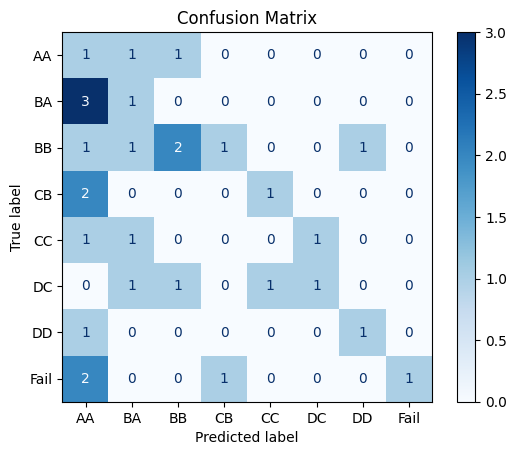

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 24.14%


C:\Users\hp\AppData\Local\Temp\ipykernel_12472\2784399129.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Grade', palette='viridis')


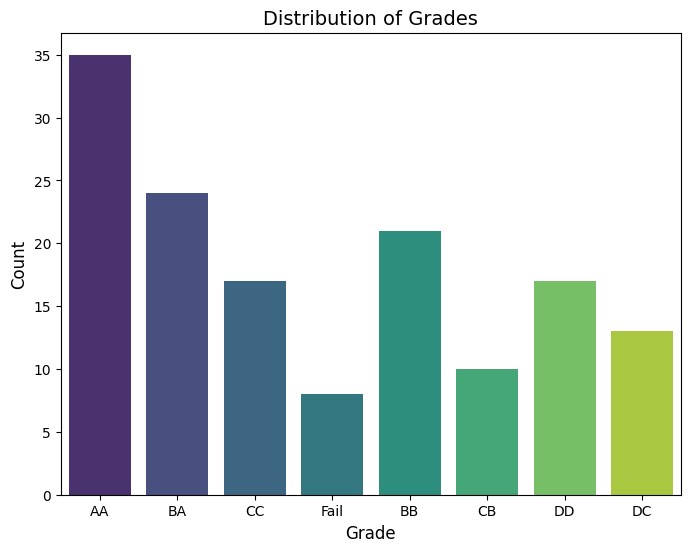

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Grades
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Grade', palette='viridis')
plt.title('Distribution of Grades', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


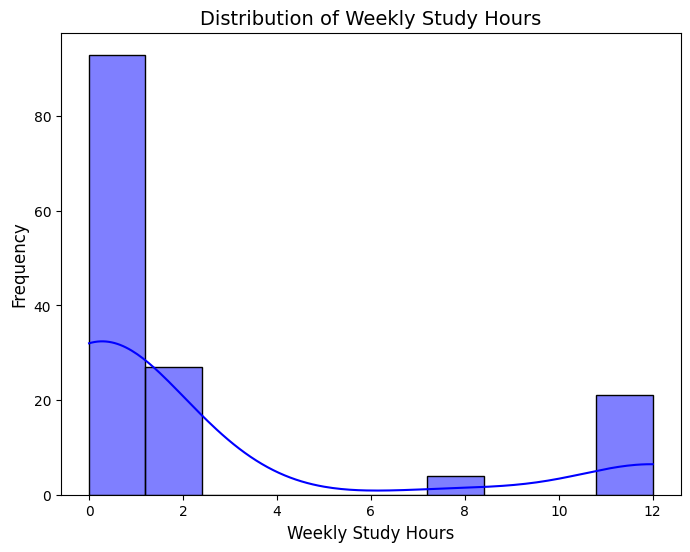

In [ ]:
# Distribution of Weekly Study Hours
plt.figure(figsize=(8, 6))
sns.histplot(df['Weekly_Study_Hours'], kde=True, color='blue', bins=10)
plt.title('Distribution of Weekly Study Hours', fontsize=14)
plt.xlabel('Weekly Study Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


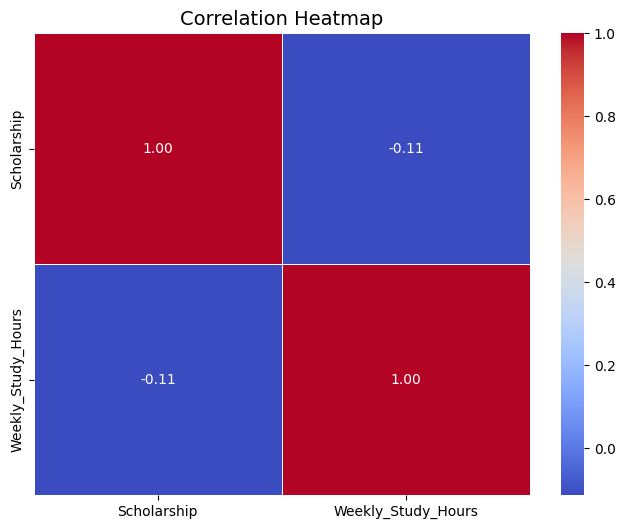

In [ ]:
# Calculate correlation matrix
corr = df[['Scholarship', 'Weekly_Study_Hours']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_12472\754949814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Grade', y='Weekly_Study_Hours', palette='Set2')


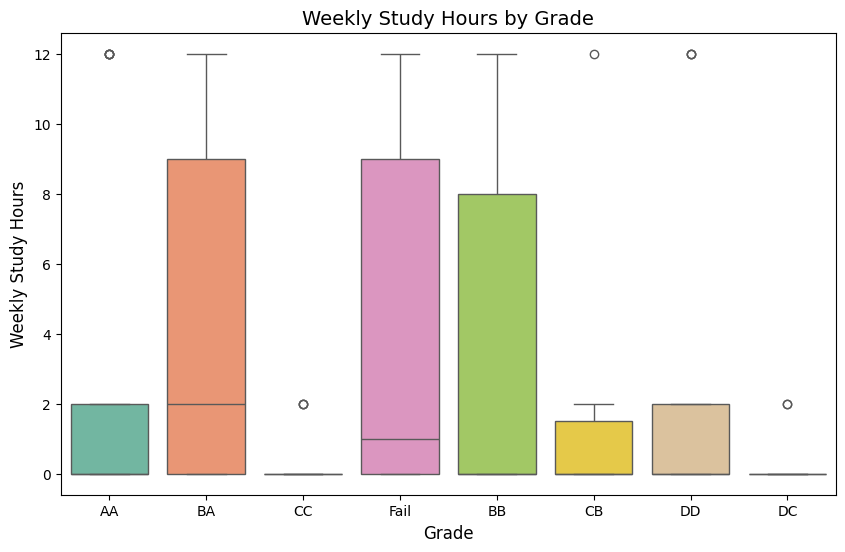

In [ ]:
# Boxplot of Weekly Study Hours by Grade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Grade', y='Weekly_Study_Hours', palette='Set2')
plt.title('Weekly Study Hours by Grade', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Weekly Study Hours', fontsize=12)
plt.show()


KeyError: 'Grade'

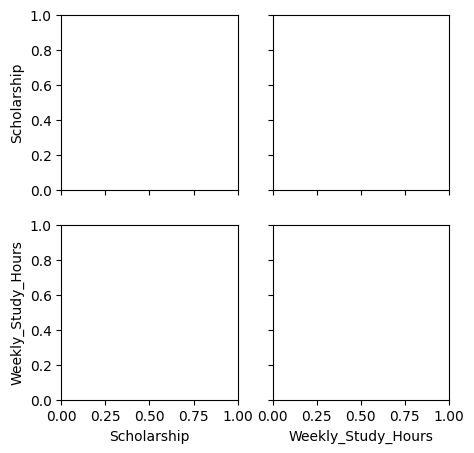

In [ ]:
# Pairplot for selected features with Grade as hue
sns.pairplot(df[['Scholarship', 'Weekly_Study_Hours', 'Attendance']], hue='Grade', palette='Set1')
plt.suptitle('Pairplot for Selected Features', fontsize=14, y=1.02)
plt.show()


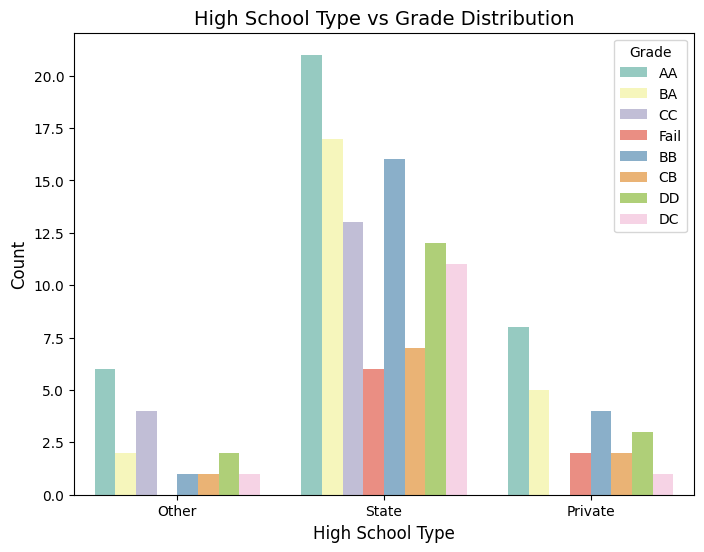

In [ ]:
# Countplot of High_School_Type by Grade
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='High_School_Type', hue='Grade', palette='Set3')
plt.title('High School Type vs Grade Distribution', fontsize=14)
plt.xlabel('High School Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data cleaning and preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create model pipeline with Decision Tree
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Function to get user input and make prediction
def predict_grade():
    print("Please enter the following student details:")
    
    features = {
        'Student_Age': input("Age group (18/19-22/23-27): "),
        'Sex': input("Gender (Male/Female): "),
        'High_School_Type': input("High School Type (State/Private/Other): "),
        'Scholarship': float(input("Scholarship percentage (0-100, without %): ")) / 100,
        'Additional_Work': input("Additional Work (Yes/No): "),
        'Sports_activity': input("Sports Activity (Yes/No): "),
        'Transportation': input("Transportation (Private/Bus): "),
        'Weekly_Study_Hours': float(input("Weekly Study Hours: ")),
        'Attendance': input("Attendance (Always/Never/Sometimes): "),
        'Reading': input("Reading Habit (Yes/No): "),
        'Notes': input("Takes Notes (Yes/No): "),
        'Listening_in_Class': input("Listens in Class (Yes/No): "),
        'Project_work': input("Does Project Work (Yes/No): ")
    }
    
    input_df = pd.DataFrame([features])
    prediction = model.predict(input_df)
    print(f"\nPredicted Grade: {prediction[0]}")

# Example usage
predict_grade()


Model Accuracy: 0.17
Please enter the following student details:

Predicted Grade: BB


In [ ]:
# Create model pipeline with tuned Decision Tree
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=5,               # Limit the depth for interpretability
        min_samples_split=10,     # Minimum samples required to split an internal node
        random_state=42))
])


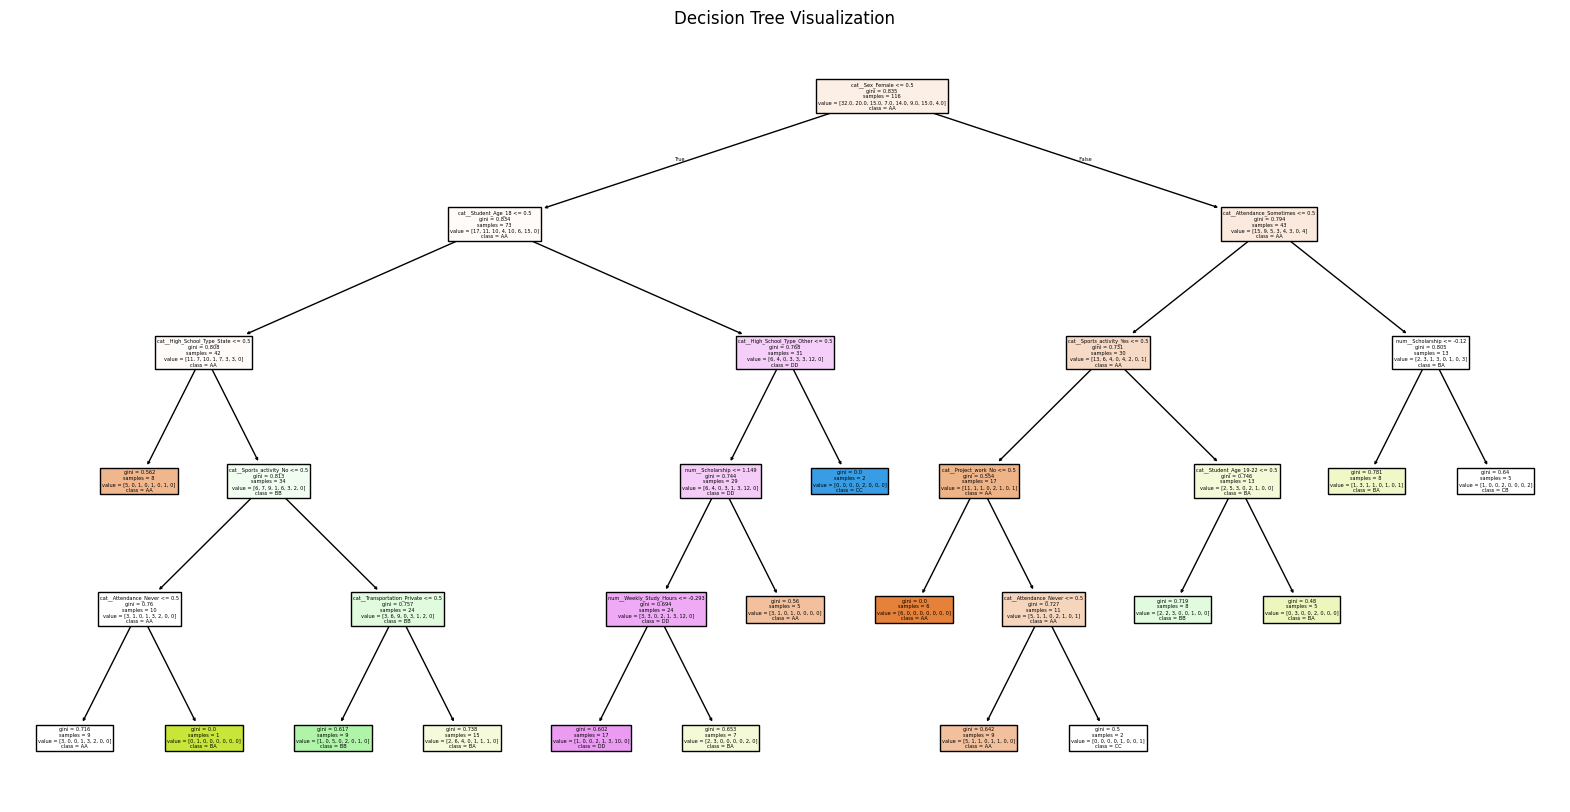

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract trained DecisionTreeClassifier from pipeline
trained_tree = model.named_steps['classifier']

# Fit preprocessed data separately to visualize
X_transformed = preprocessor.fit_transform(X_train)
trained_tree.fit(X_transformed, y_train)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(trained_tree,
          filled=True,
          feature_names=preprocessor.get_feature_names_out(),
          class_names=sorted(y.unique()))
plt.title("Decision Tree Visualization")
plt.show()


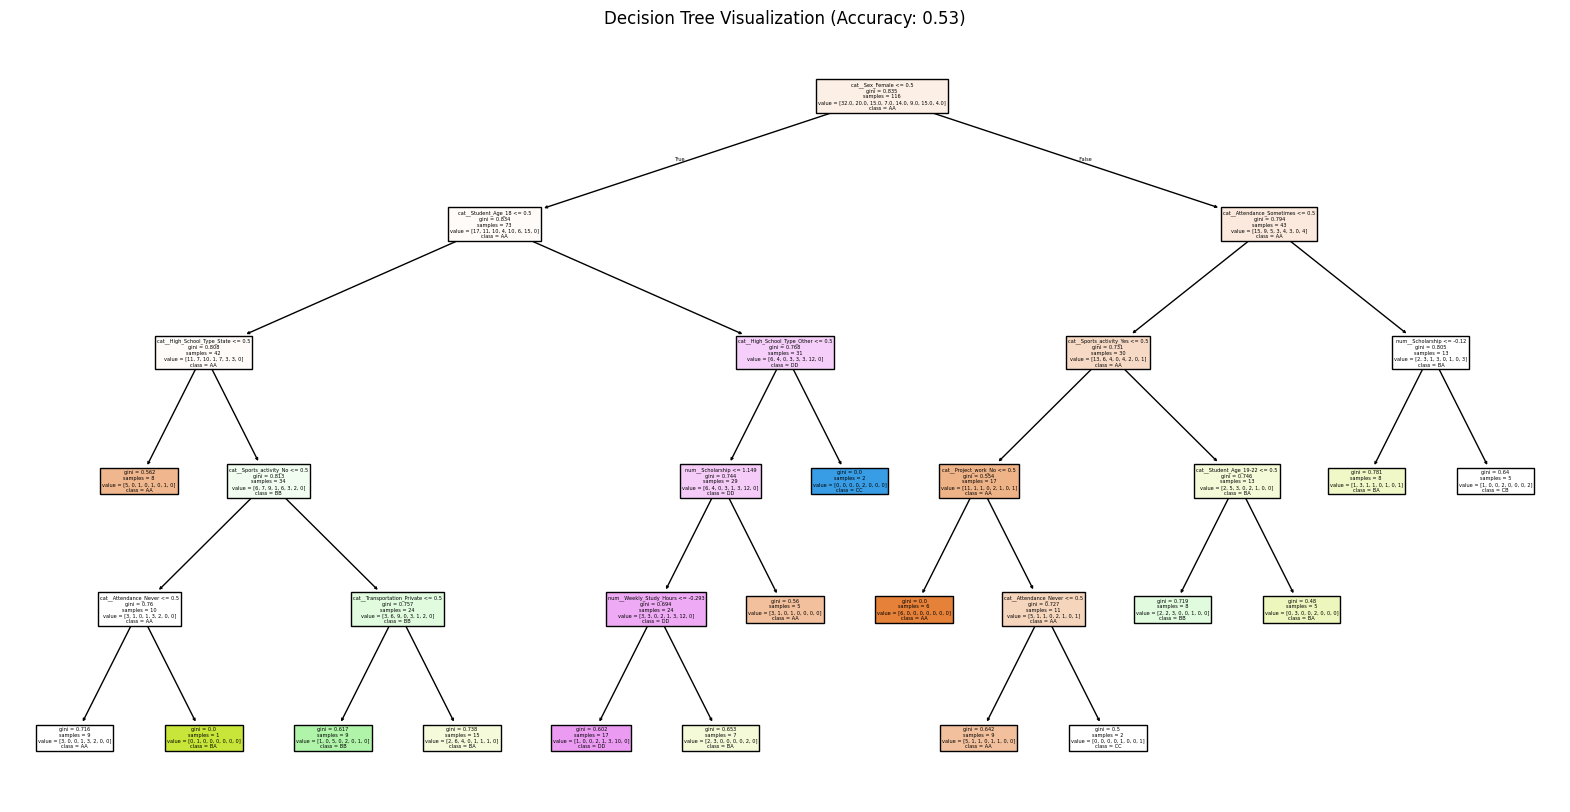

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# Extract trained DecisionTreeClassifier from pipeline
trained_tree = model.named_steps['classifier']

# Transform training data with the preprocessor
X_transformed = preprocessor.fit_transform(X_train)

# Fit the classifier on transformed data
trained_tree.fit(X_transformed, y_train)

# Predict on training set
y_pred_train = trained_tree.predict(X_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(trained_tree,
          filled=True,
          feature_names=preprocessor.get_feature_names_out(),
          class_names=sorted(y_train.unique()))
plt.title(f"Decision Tree Visualization (Accuracy: {accuracy:.2f})")
plt.show()


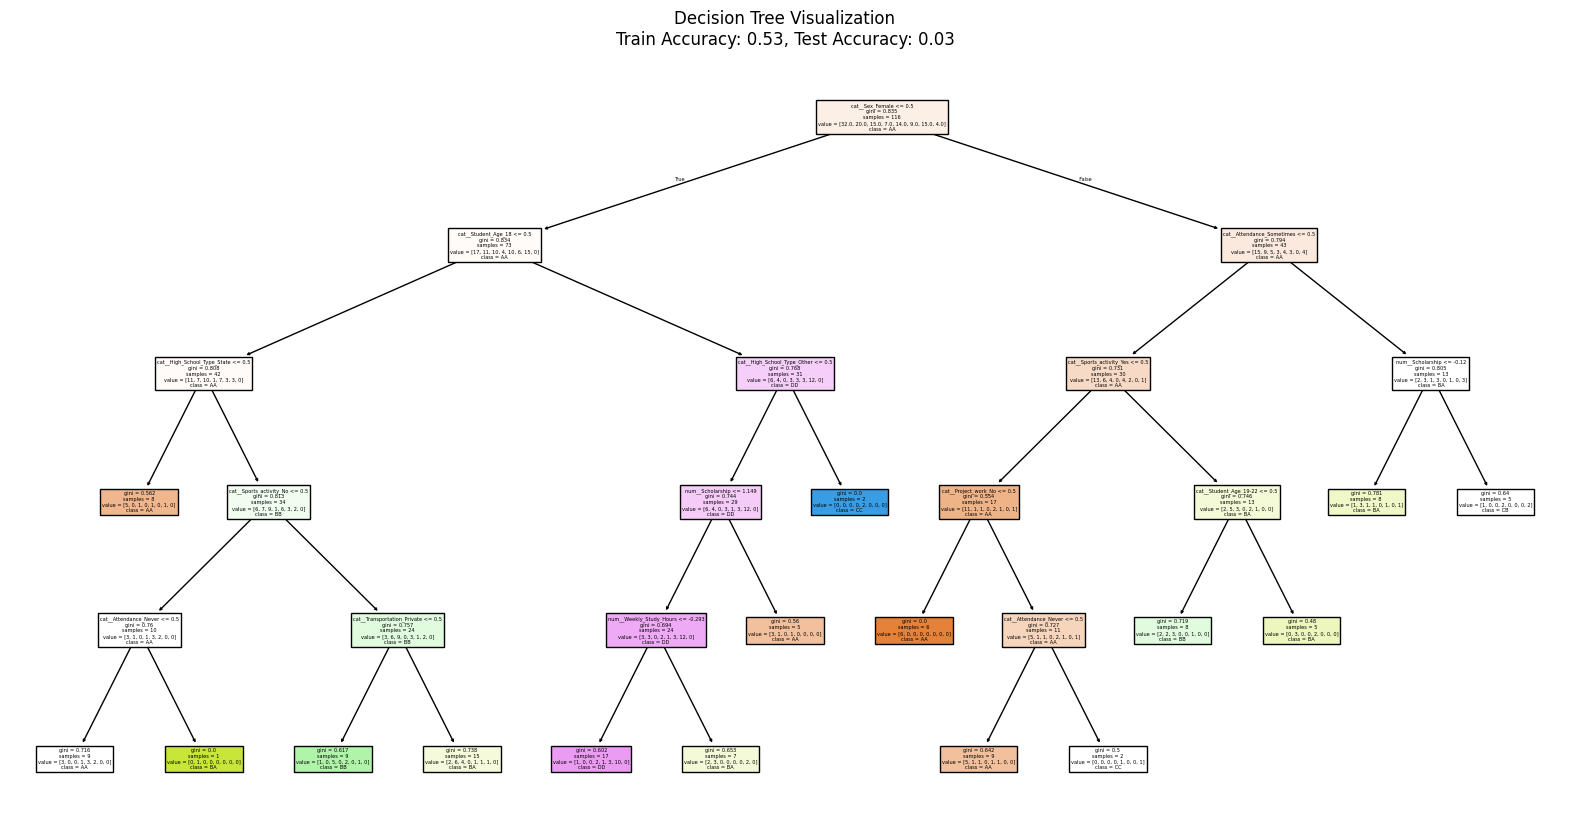

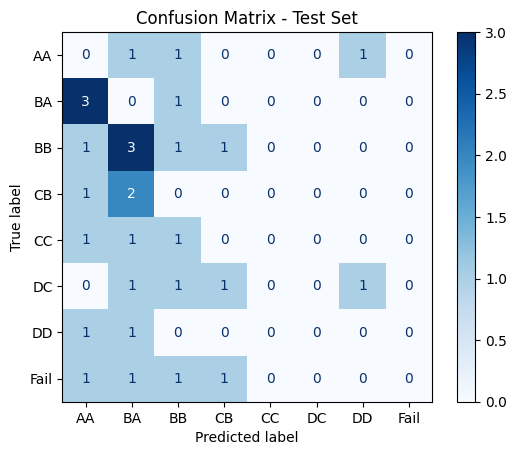

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Extract trained DecisionTreeClassifier from pipeline
trained_tree = model.named_steps['classifier']

# Fit the preprocessor and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train the decision tree on transformed training data
trained_tree.fit(X_train_transformed, y_train)

# Predict on training and test data
y_train_pred = trained_tree.predict(X_train_transformed)
y_test_pred = trained_tree.predict(X_test_transformed)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(trained_tree,
          filled=True,
          feature_names=preprocessor.get_feature_names_out(),
          class_names=sorted(y_train.unique()))
plt.title(f"Decision Tree Visualization\nTrain Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
plt.show()

# Display confusion matrix for test data
cm = confusion_matrix(y_test, y_test_pred, labels=sorted(y_train.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_train.unique()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# Create and train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Avoid warning for label encoding

# Fit the preprocessor and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Fit the model on training data
xgb_model.fit(X_train_transformed, y_train)

# Predict on both training and test sets
y_train_pred = xgb_model.predict(X_train_transformed)
y_test_pred = xgb_model.predict(X_test_transformed)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f"XGBoost Train Accuracy: {train_accuracy:.2f}")
print(f"XGBoost Test Accuracy: {test_accuracy:.2f}")

# Display confusion matrix for test data
cm = confusion_matrix(y_test, y_test_pred, labels=sorted(y_train.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_train.unique()))
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix - Test Set")
plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# === Step 1: Preprocess the data ===
# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
# Transform the test data (do not fit again!)
X_test_transformed = preprocessor.transform(X_test)

# === Step 2: Train the XGBoost Classifier ===
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_transformed, y_train)

# === Step 3: Make Predictions ===
y_train_pred = xgb_model.predict(X_train_transformed)
y_test_pred = xgb_model.predict(X_test_transformed)

# === Step 4: Calculate Accuracies ===
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"✅ XGBoost Train Accuracy: {train_accuracy:.2f}")
print(f"✅ XGBoost Test Accuracy: {test_accuracy:.2f}")

# === Step 5: Confusion Matrix (Test Set) ===
cm = confusion_matrix(y_test, y_test_pred, labels=sorted(y_train.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_train.unique()))
disp.plot(cmap=plt.cm.Blues)
plt.title("📊 XGBoost Confusion Matrix - Test Set")
plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Optional: Plot Feature Importances
import numpy as np

feature_names = preprocessor.get_feature_names_out()
importances = xgb_model.feature_importances_

# Plot top features
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[sorted_idx], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=90)
plt.title("🔍 XGBoost Feature Importances")
plt.tight_layout()
plt.show()


NameError: name 'xgb_model' is not defined

In [ ]:
from sklearn.metrics import classification_report

print("📄 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


📄 Classification Report (Test Data):
              precision    recall  f1-score   support

          AA       0.00      0.00      0.00         3
          BA       0.00      0.00      0.00         4
          BB       0.17      0.17      0.17         6
          CB       0.00      0.00      0.00         3
          CC       0.00      0.00      0.00         3
          DC       0.00      0.00      0.00         4
          DD       0.00      0.00      0.00         2
        Fail       0.00      0.00      0.00         4

    accuracy                           0.03        29
   macro avg       0.02      0.02      0.02        29
weighted avg       0.03      0.03      0.03        29



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:156

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data cleaning and preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create XGBoost model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"✅ XGBoost Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Function to get user input and make prediction
def predict_grade():
    print("Please enter the following student details:")
    
    features = {
        'Student_Age': input("Age group (18/19-22/23-27): "),
        'Sex': input("Gender (Male/Female): "),
        'High_School_Type': input("High School Type (State/Private/Other): "),
        'Scholarship': float(input("Scholarship percentage (0-100, without %): ")) / 100,
        'Additional_Work': input("Additional Work (Yes/No): "),
        'Sports_activity': input("Sports Activity (Yes/No): "),
        'Transportation': input("Transportation (Private/Bus): "),
        'Weekly_Study_Hours': float(input("Weekly Study Hours: ")),
        'Attendance': input("Attendance (Always/Never/Sometimes): "),
        'Reading': input("Reading Habit (Yes/No): "),
        'Notes': input("Takes Notes (Yes/No): "),
        'Listening_in_Class': input("Listens in Class (Yes/No): "),
        'Project_work': input("Does Project Work (Yes/No): ")
    }
    
    input_df = pd.DataFrame([features])
    prediction = model.predict(input_df)
    print(f"\n📚 Predicted Grade: {prediction[0]}")

# Example usage
predict_grade()


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data cleaning and preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create Lasso Regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Regularization strength (tune alpha as needed)
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Since Lasso is for regression, we calculate Mean Squared Error (MSE) for performance
mse = mean_squared_error(y_test, y_pred)
print(f"✅ Lasso Regression Mean Squared Error: {mse:.2f}")

# If grades are categorical, you can consider categorizing predictions for confusion matrix
# For now, assuming grades are continuous, this would not apply directly, but if categorizing:
y_pred_class = [round(val) for val in y_pred]  # Convert continuous to integer grades

# Confusion Matrix (if categorizing predictions)
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("📊 Lasso Regression Confusion Matrix")
plt.show()

# Accuracy calculation (if needed for categorical grades)
accuracy = (y_pred_class == y_test).mean()
print(f"✅ Lasso Regression Accuracy: {accuracy:.2f}")


ValueError: could not convert string to float: 'Fail'

✅ Lasso Regression Mean Squared Error: 5.66


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


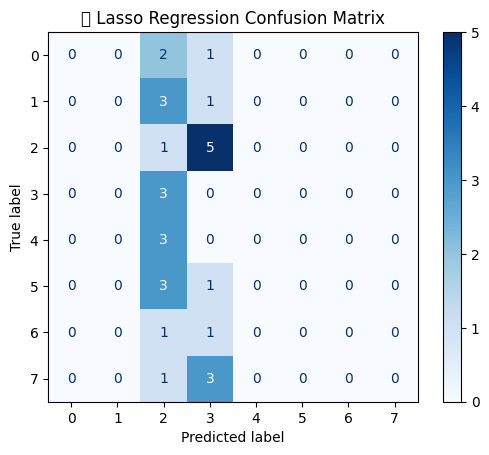

✅ Lasso Regression Accuracy: 0.03


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data cleaning and preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Encode target variable 'Grade' using LabelEncoder
label_encoder = LabelEncoder()
df['Grade'] = label_encoder.fit_transform(df['Grade'])  # This will convert grades like 'Fail' -> 0, 'Pass' -> 1, etc.

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create Lasso Regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Regularization strength (tune alpha as needed)
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Since Lasso is for regression, we calculate Mean Squared Error (MSE) for performance
mse = mean_squared_error(y_test, y_pred)
print(f"✅ Lasso Regression Mean Squared Error: {mse:.2f}")

# Convert the continuous predictions back to classes (round them to nearest integer)
y_pred_class = [round(val) for val in y_pred]  # Convert continuous predictions to integer classes

# Confusion Matrix (for classification-like task)
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("📊 Lasso Regression Confusion Matrix")
plt.show()

# Accuracy calculation (if needed for categorical grades)
accuracy = (y_pred_class == y_test).mean()
print(f"✅ Lasso Regression Accuracy: {accuracy:.2f}")


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10

✅ KNN Accuracy: 0.17


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


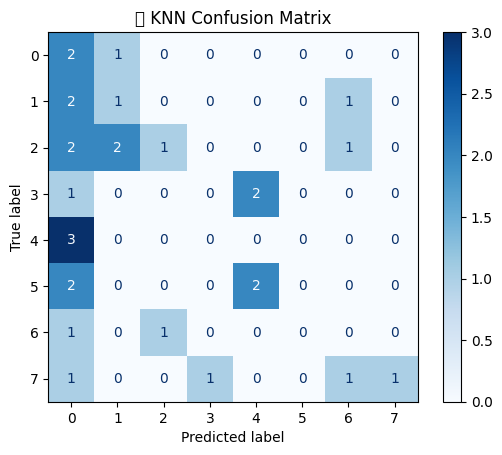

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data cleaning and preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Encode target variable 'Grade' using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Grade'] = label_encoder.fit_transform(df['Grade'])  # This will convert grades like 'Fail' -> 0, 'Pass' -> 1, etc.

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create KNN classifier model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Using K=5 for KNN
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ KNN Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("📊 KNN Confusion Matrix")
plt.show()


Random Forest Accuracy: 0.24


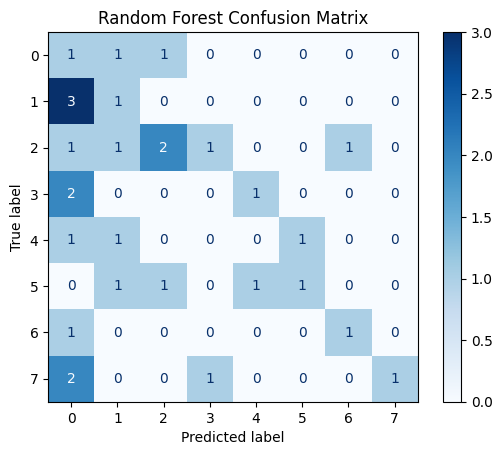

KNN Accuracy: 0.17


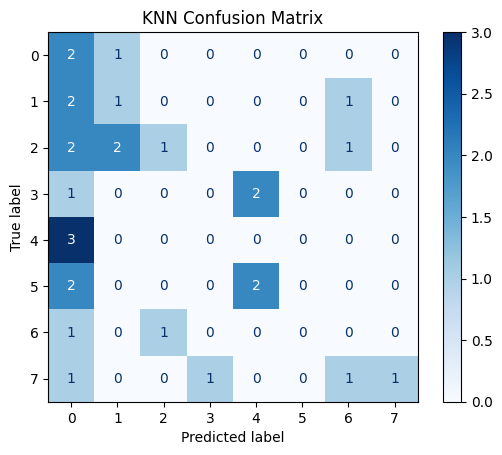

Lasso Regression Accuracy: 0.03


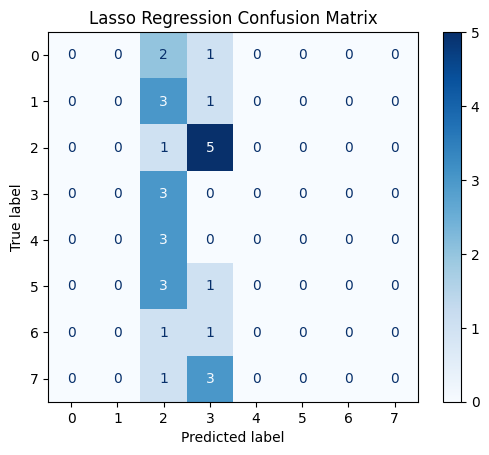

NameError: name 'XGBClassifier' is not defined

In [ ]:
# Import required libraries
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Random Forest
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
rf_cm = confusion_matrix(y_test, rf_y_pred)
ConfusionMatrixDisplay(confusion_matrix=rf_cm).plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

# KNN
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.2f}")
knn_cm = confusion_matrix(y_test, knn_y_pred)
ConfusionMatrixDisplay(confusion_matrix=knn_cm).plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()

# Lasso Regression
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_accuracy = (lasso_y_pred.round() == y_test).mean()  # Since it's a regression model, rounding predictions
print(f"Lasso Regression Accuracy: {lasso_accuracy:.2f}")
lasso_cm = confusion_matrix(y_test, lasso_y_pred.round())
ConfusionMatrixDisplay(confusion_matrix=lasso_cm).plot(cmap=plt.cm.Blues)
plt.title("Lasso Regression Confusion Matrix")
plt.show()

# XGBoost (If applicable)
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
ConfusionMatrixDisplay(confusion_matrix=xgb_cm).plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

# Summary of results
print("\nModel Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(f"Lasso Regression Accuracy: {lasso_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(Students _Performance _Prediction.csv')

# Data cleaning and preprocessing
df['Notes'] = df['Notes'].replace('6', 'No')
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Lasso': Lasso(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Create a pipeline with the preprocessor and classifier
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', model)])
    
    # Train the model
    clf_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf_pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"📊 {model_name} Confusion Matrix")
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Students_Performance_Prediction.csv'


Random Forest Accuracy: 0.24


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


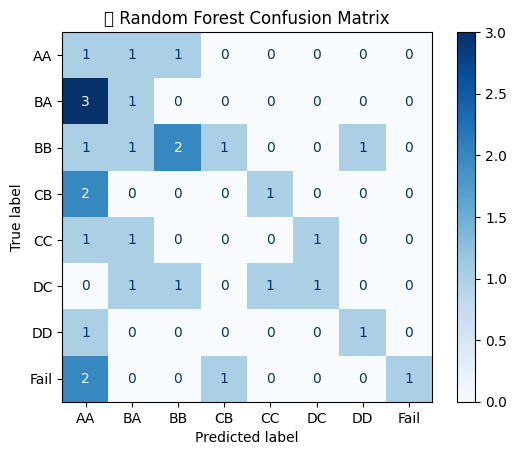


KNN Accuracy: 0.17


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


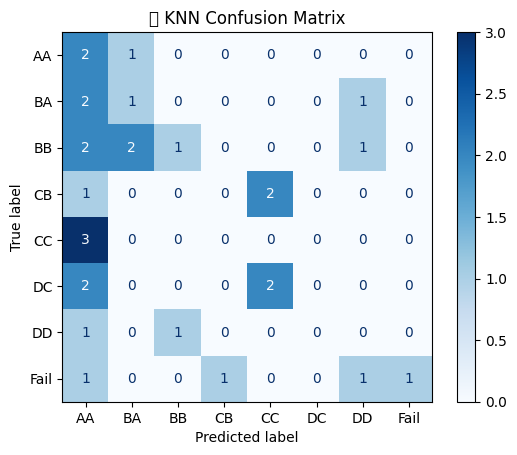

ValueError: could not convert string to float: 'Fail'

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data cleaning and preprocessing
df['Notes'] = df['Notes'].replace('6', 'No')
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Lasso': Lasso(),
   # 'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Create a pipeline with the preprocessor and classifier
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', model)])
    
    # Train the model
    clf_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf_pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"📊 {model_name} Confusion Matrix")
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle

# Example: Assume df is your training data and these are the numerical columns
scaler = StandardScaler()
scaler.fit(df[['Scholarship', 'Weekly_Study_Hours']])

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
